In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]
print(sdss.keys())
print("\nNumber of galaxies in complete sample = {0}".format(len(sdss)))

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'ssfr']

Number of galaxies in complete sample = 229889


In [3]:
from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
sdss['rvir_halo_kpc'] = halo_radius_vs_stellar_mass(10**sdss['sm'])

In [4]:
from galsize_models.models import component_size_vs_rhalo, galaxy_size_vs_rhalo
scatter = 0.2
norm_bulge, norm_disk = 0.08, 0.08
alpha_bulge, alpha_disk = 0.65, 0.65
size_model1 = galaxy_size_vs_rhalo(sdss['rvir_halo_kpc'], sdss['bulge_to_total_rband_meert15'], 
                                   norm_bulge, norm_disk, alpha_bulge, alpha_disk, 
                                   scatter=scatter)

norm_bulge, norm_disk = 0.02, 0.1
alpha_bulge, alpha_disk = 0.85, 0.55
size_model2 = galaxy_size_vs_rhalo(sdss['rvir_halo_kpc'], sdss['bulge_to_total_rband_meert15'], 
                                   norm_bulge, norm_disk, alpha_bulge, alpha_disk, 
                                   scatter=scatter)


In [5]:
from galsize_models.measurements.rhalf_rvir_power_law_fit import rvir_rhalf_power_law_index_and_normalization as c1_c0_fit

alpha_true_all, norm_true_all = c1_c0_fit(sdss['r50_magr_kpc_meert15'], sdss['rvir_halo_kpc'])
# print("SDSS:   alpha = {0:.2f}, norm = {1:.2f}".format(alpha_true_all, norm_true_all))

alpha_model2_all, norm_model2_all = c1_c0_fit(size_model2, sdss['rvir_halo_kpc'])
# print("Model:  alpha = {0:.2f}, norm = {1:.2f}".format(alpha_model2_all, norm_model2_all))

from astropy.table import Table
t = Table()
t['data'] = ['SDSS', 'Model']
t['alpha'] = [round(alpha_true_all, 2), round(alpha_model2_all, 2)]
t['norm'] = [round(norm_true_all, 2), round(norm_model2_all, 2)]
print(t)

 data alpha norm
----- ----- ----
 SDSS  0.65 0.08
Model  0.71 0.04


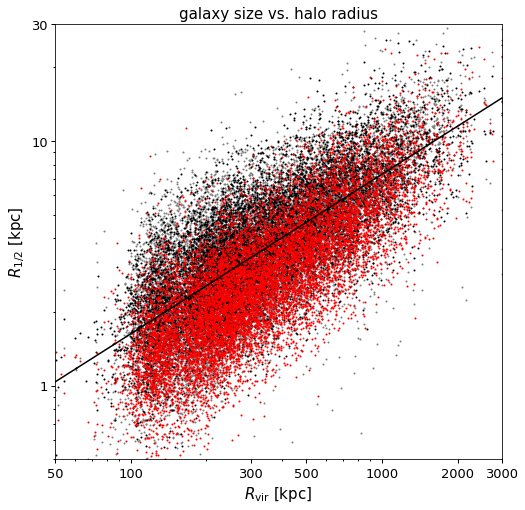

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
__=ax.loglog()

nskip = 20
__=ax.scatter(sdss['rvir_halo_kpc'][::nskip], 
              sdss['r50_magr_kpc_meert15'][::nskip], 
              color='gray', s=1, label='')

__=ax.scatter(sdss['rvir_halo_kpc'][::nskip], 
              size_model1[::nskip], 
              color='k', s=1, label='')

__=ax.scatter(sdss['rvir_halo_kpc'][::nskip], 
              size_model2[::nskip], 
              color='red', s=1, label='')

rhalo_abscissa = np.linspace(10, 25000, 200)
__=ax.plot(rhalo_abscissa, norm_true_all*rhalo_abscissa**alpha_true_all, 
          color='k', label='all galaxies')

# __=ax.plot(0.01*rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, 
#           color='blue', label='star-forming galaxies')
# __=ax.plot(0.01*rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, 
#           color='green', label='green valley galaxies')
# __=ax.plot(0.01*rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, 
#           color='red', label='quenched galaxies')


xlim = ax.set_xlim(50, 3000)
ylim = ax.set_ylim(0.5, 30)
__=ax.set_xticks((50, 100, 300, 500, 1000, 2000, 3000))
__=ax.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel = ax.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax.set_title('galaxy size vs. halo radius')
# legend = ax.legend()
